In [1]:
import argparse

In [2]:
args = argparse.Namespace(random_seed=123, is_training=1, model='PathFormer', 
                          model_id='ETTh1_96_96', data='ETTh1', root_path='./dataset/ETT-small/', 
                          data_path='ETTh1.csv', features='M', target='OT', freq='h', 
                          checkpoints='./checkpoints/', seq_len=96, pred_len=96, individual=False, 
                          d_model=4, d_ff=64, num_nodes=7, layer_nums=1, k=3, num_experts=4, 
                          patch_size_list=[16, 12, 8, 32], do_predict=False, revin=1, drop=0.1, 
                          embed='timeF', residual_connection=1, metric='mae', num_workers=0, itr=1, 
                          train_epochs=30, batch_size=128, patience=10, learning_rate=0.0005, 
                          lradj='TST', use_amp=False, pct_start=0.4, use_gpu=True, gpu=0, 
                          use_multi_gpu=False, devices='2', test_flop=False)

In [3]:
from data_provider.data_factory import data_provider
data_set, data_loader = data_provider(args, 'test')

test 2785
test False


In [4]:
data_set.data_x.shape

(2976, 7)

In [5]:
from models import PathFormer
model = PathFormer.Model(args).float()

In [6]:
import torch
import os
setting = '{}_{}_ft{}_sl{}_pl{}_{}_{}'.format(
                args.model_id,
                args.model,
                args.data_path[:-4],
                args.features,
                args.seq_len,
                args.pred_len, args.random_seed)
model.load_state_dict(torch.load(os.path.join('./checkpoints/' + setting, 'checkpoint.pth')))

<All keys matched successfully>

In [7]:
# batch_x, batch_y, _, batch_x_mark, batch_y_mark = next(iter(data_loader))
lookback = torch.from_numpy(data_set.data_x[:args.seq_len]).reshape(1, args.seq_len, -1)

In [8]:
outputs_l, expert_outputs_l = model(lookback.float())
# outputs_l = outputs_l.detach().numpy()
# expert_outputs_l[0] = expert_outputs_l[0].detach().numpy()
# expert_outputs_l[1] = expert_outputs_l[1].detach().numpy()
# expert_outputs_l[2] = expert_outputs_l[2].detach().numpy()
# expert_outputs_l[3] = expert_outputs_l[3].detach().numpy()

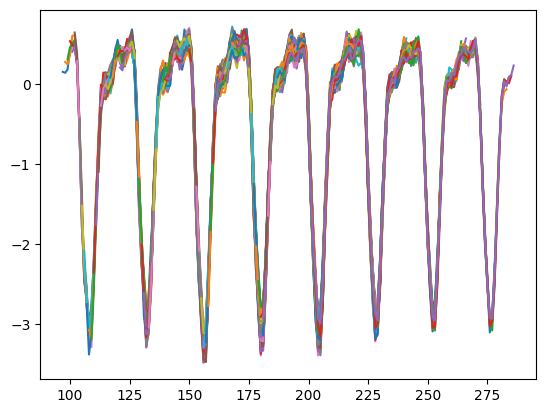

In [37]:
for i in range(1, args.seq_len):
    ar = torch.cat((lookback[0][i:, :], outputs_l[0][:i, :])).reshape(1, args.seq_len, -1)
    o, _ = model(ar.float())
    ar = ar.detach().numpy()
    o = o.detach().numpy()
    # plt.plot(np.arange(i, i+args.seq_len), ar[0][:,0])
    plt.plot(np.arange(i+args.seq_len, i+args.seq_len+args.pred_len), o[0][:,0])
plt.show()

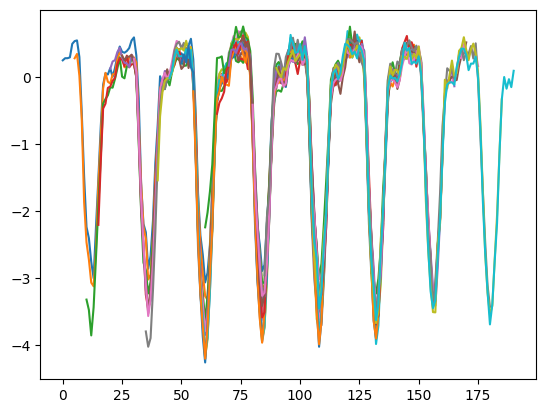

In [11]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(0, args.pred_len, 5):
    # plt.plot(np.arange(args.seq_len), batch_x[i][:,0])
    # plt.plot(np.arange(args.seq_len, args.seq_len+args.pred_len), batch_y[i][:,0])
    plt.plot(np.arange(i, i+args.pred_len), outputs_l[i][:,0])
    # plt.plot(np.arange(args.seq_len, args.seq_len+args.pred_len), expert_outputs_l[0][0][:,0])
    # plt.plot(np.arange(args.seq_len, args.seq_len+args.pred_len), expert_outputs_l[1][0][:,0])
    # plt.plot(np.arange(args.seq_len, args.seq_len+args.pred_len), expert_outputs_l[2][0][:,0])
    # plt.plot(np.arange(args.seq_len, args.seq_len+args.pred_len), expert_outputs_l[3][0][:,0])
plt.show()

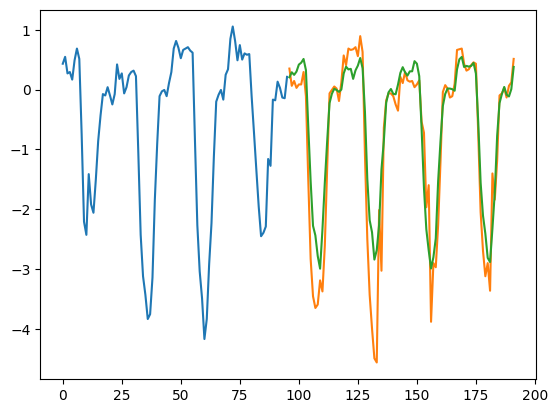

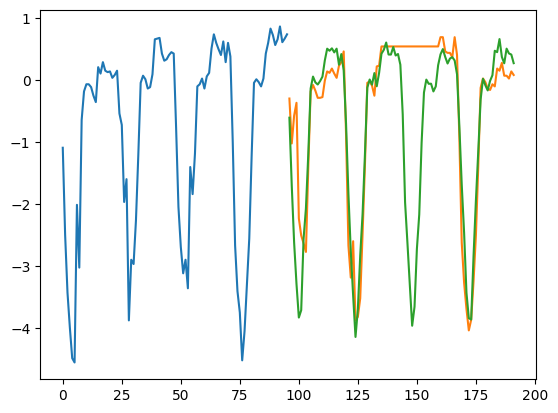

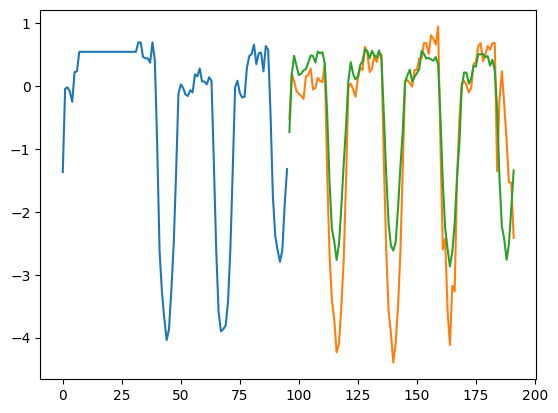

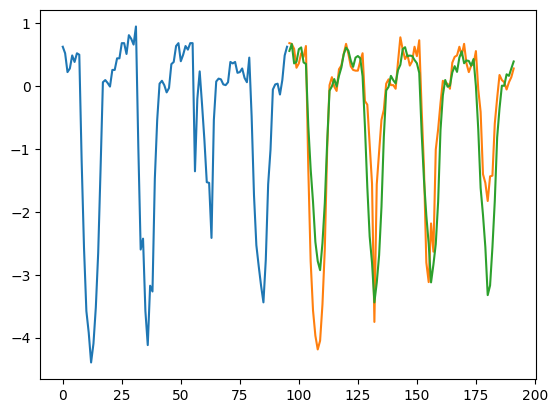

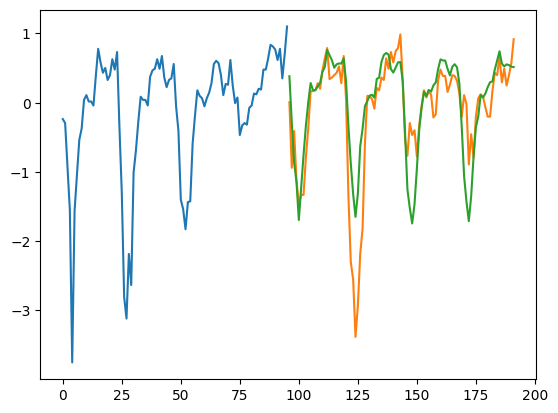

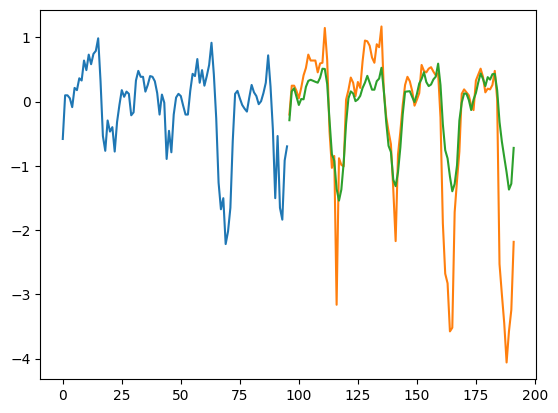

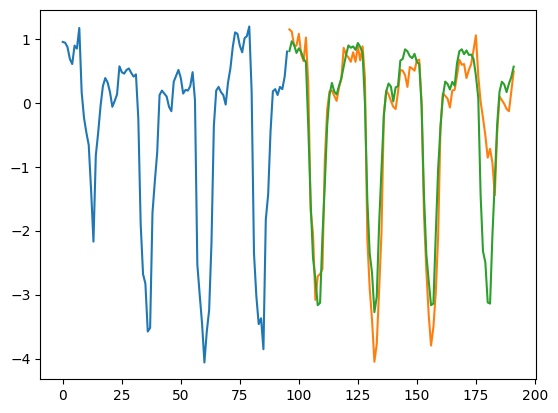

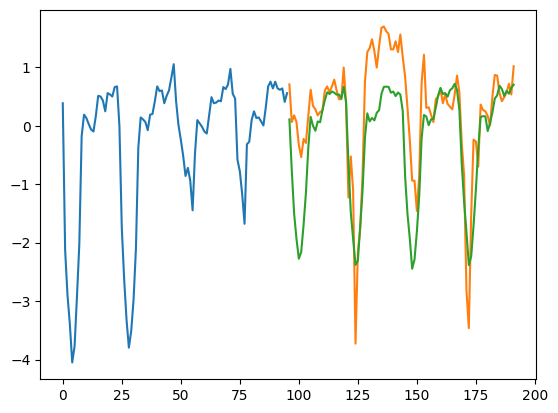

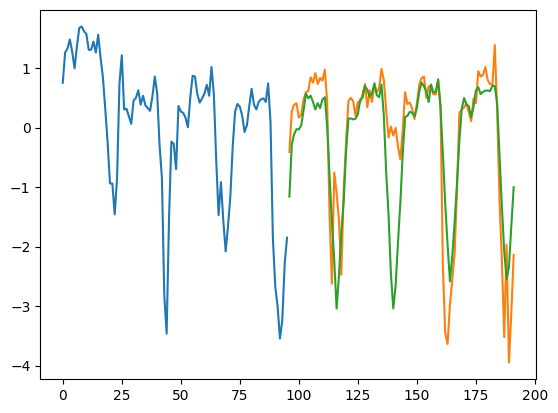

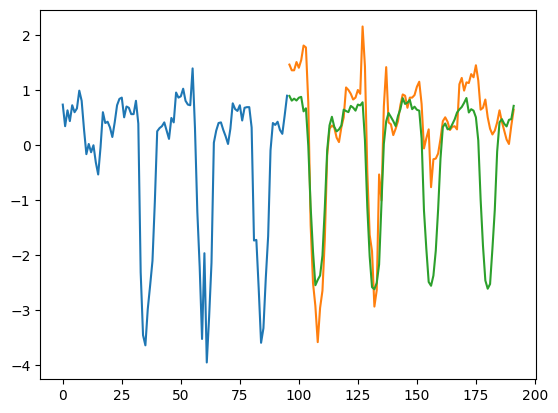

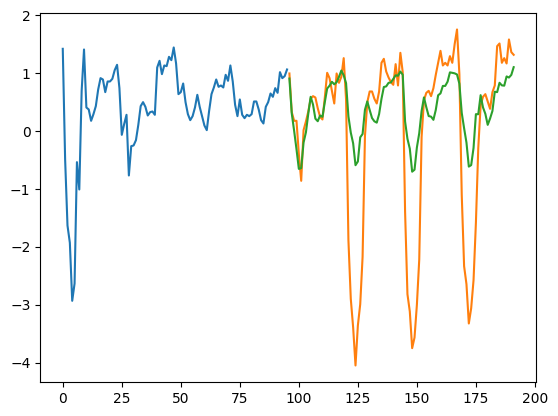

In [9]:
for i, (batch_x, batch_y, batch_u, batch_x_mark, batch_y_mark) in enumerate(data_loader):
    outputs_l, expert_outputs_l = model(batch_x.float())
    
    outputs_l = outputs_l.detach().numpy()
    expert_outputs_l[0] = expert_outputs_l[0].detach().numpy()
    expert_outputs_l[1] = expert_outputs_l[1].detach().numpy()
    expert_outputs_l[2] = expert_outputs_l[2].detach().numpy()
    expert_outputs_l[3] = expert_outputs_l[3].detach().numpy()

    plt.plot(np.arange(args.seq_len), batch_x[0][:,0])
    plt.plot(np.arange(args.seq_len, args.seq_len+args.pred_len), batch_y[0][:,0])
    plt.plot(np.arange(args.seq_len, args.seq_len+args.pred_len), outputs_l[0][:,0])
    plt.show()

    if i ==10:
        break


In [43]:
data_loader.shuffle

AttributeError: 'DataLoader' object has no attribute 'shuffle'